
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [3]:
# ANSWER
titanic_csv = '../DATA/titanic_train.csv'
df=pd.read_csv('titanic_train (1).csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

In [6]:
# Shape
df.shape

(891, 11)

In [7]:
# Head
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Check how many data are missing in these columns
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

In [10]:
def bar_chart(train, feature):
    survived = train[train['Survived']==1][feature].value_counts(normalize=True)*100
    dead = train[train['Survived']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

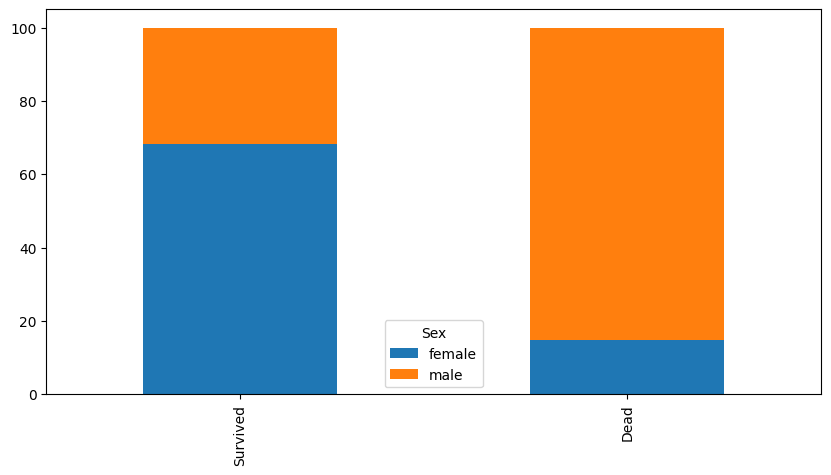

In [11]:
# Sex
bar_chart(df, 'Sex')

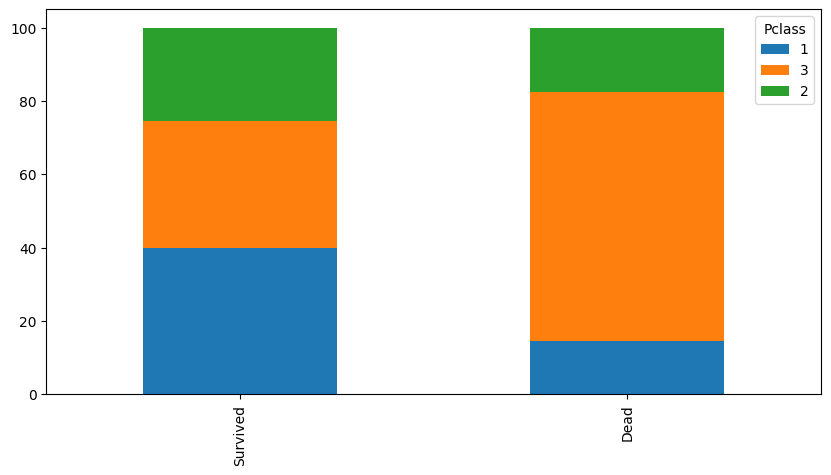

In [12]:
# Pclass
bar_chart(df, 'Pclass')

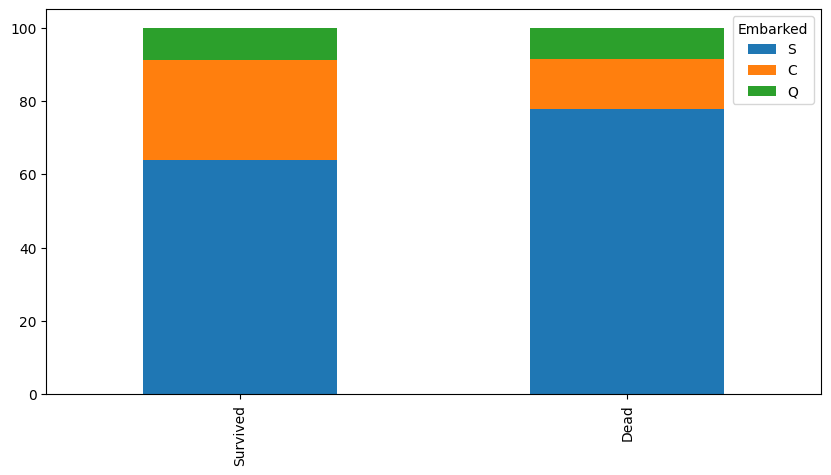

In [13]:
# Embarked
bar_chart(df, 'Embarked')

In [14]:
# Find median age by sex

df.groupby("Sex")["Age"].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [15]:
# The following is an array of the median age by sex
df.groupby("Sex")["Age"].transform("median")

PassengerId
1      29.0
2      27.0
3      27.0
4      27.0
5      29.0
       ... 
887    29.0
888    27.0
889    27.0
890    29.0
891    29.0
Name: Age, Length: 891, dtype: float64

In [18]:
# fill missing age with median age for each sex (0 (male), 1 (female))
df["Age"].fillna(df.groupby("Sex")["Age"].transform("median"), inplace=True)

C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


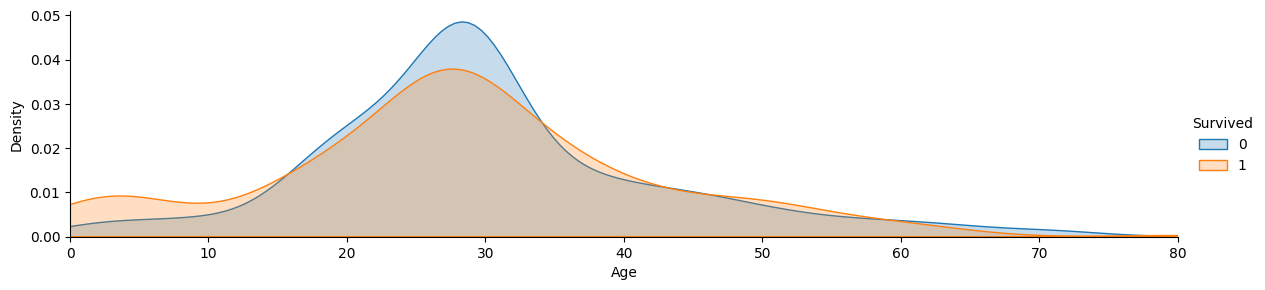

In [19]:
# Age
facetgridplot(df, 'Age')

C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


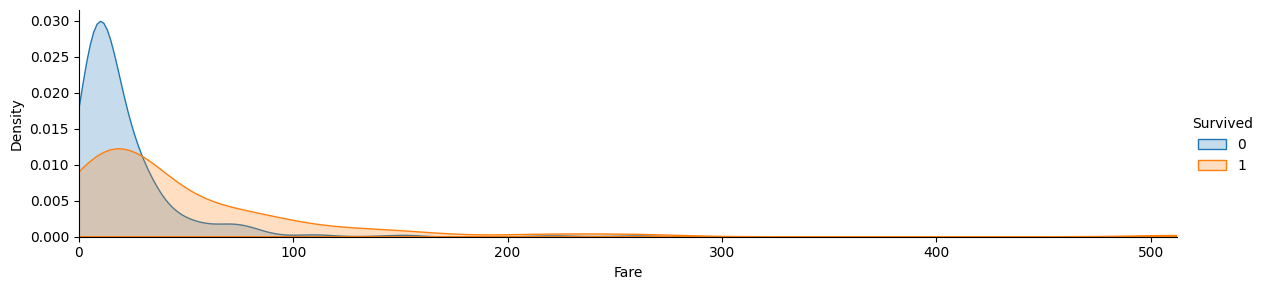

In [20]:
# Fare
facetgridplot(df, 'Fare')

In [21]:
# fill missing embarked with `S` as most people embarked from there
df['Embarked'].fillna('S', inplace=True)

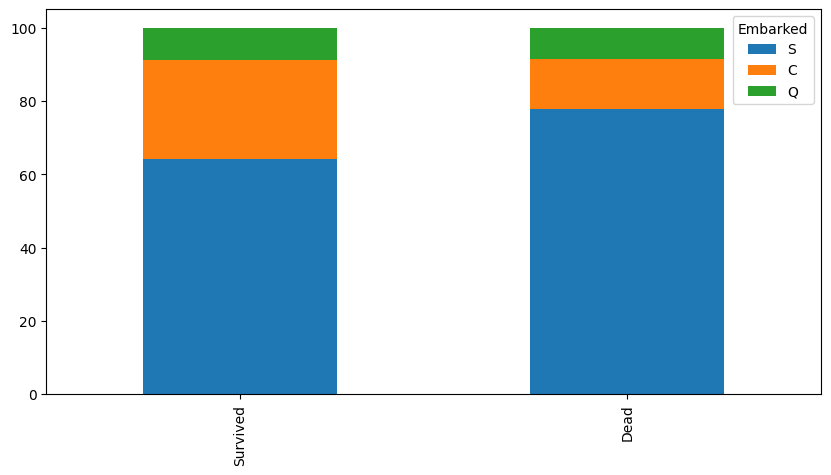

In [22]:
bar_chart(df, 'Embarked')

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class and parents/children features:

In [23]:
# ANSWER
feature_cols = ['Pclass', 'Parch']
X = df[feature_cols]
y = df['Survived']

#### 3.2 Split

Split the data into training and testing subsets:

In [24]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [25]:
# ANSWER
# Create Model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [26]:
# ANSWER
# Fit Model
logreg.fit(X_train, y_train)

LogisticRegression()

The computed coefficients are an array stored in the 1st element of an array:

In [27]:
# ANSWER
logreg.coef_

array([[-0.87239066,  0.337888  ]])

The computed intercept is the 1st element of another array:

In [28]:
# ANSWER
logreg.intercept_

array([1.30430282])

We can create tuples of the predictor names and coefficients like this:

In [29]:
# ANSWER
print(set(zip(feature_cols, logreg.coef_[0])))

{('Pclass', -0.872390660601778), ('Parch', 0.33788800487797466)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [30]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.872391
Parch       +0.337888


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Pclass has a coefficient of -0.844390, meaning that as the passenger class increases (e.g., from 1st class to 3rd class), the probability of survival decreases.
Parch (number of parents/children aboard) has a coefficient of +0.341242, meaning that as the number of parents/children in a group increases, the probability of survival increases.

Let's see how well the model fit the training data. The accuracy `score` is the proportion of correct predictions:

In [31]:
print('accuracy = {:7.4f}'.format(logreg.score(X_train, y_train)))

accuracy =  0.6901


Coefficients: The coefficients from the logistic regression model provide insights into how each feature affects the probability of survival. For example, being in a higher class (Pclass) reduces the probability of survival, while having more parents or children aboard (Parch) increases it.

Accuracy: The accuracy score of 69.01% indicates that the model correctly predicts survival for 69.01% of the passengers in the training data. While this is a decent accuracy, it's not perfect, suggesting that there are other factors influencing survival that the model might not be capturing perfectly, or that there could be overfitting or underfitting issues.

What is the accuracy `score` for the test data?

In [32]:
#?
print('accuracy = {:7.4f}'.format(logreg.score(X_test, y_test)))

accuracy =  0.6682


What can we say about this result?

ANSWER
- test set is predicted almost as well as training set
- overfitting seems unlikely

The logistic regression model predicts the test set almost as well as the training set, with accuracies of 69.01% and 66.82% respectively. This small difference in accuracy indicates that overfitting is unlikely, and the model generalizes well to new, unseen data. It suggests that the model has successfully learned the important features and relationships in the data, making it a reliable predictor for survival on the Titanic dataset.

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [34]:
# ANSWER
df['Age'].fillna(df.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = df[feature_cols]

In [35]:
# Build Model
logreg = LogisticRegression()

# Fit Model
logreg.fit(X_train, y_train)

# Score
logreg_score = logreg.score(X_train, y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.6901


So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- age is not related to Titanic survival
- age is not independent of other features already in the model
- imputing the missing values distorted the distribution too much

Potential Reasons
Age is Not Related to Titanic Survival:

If Age is not a significant predictor of survival in the Titanic dataset, then including it would have a minimal impact on the model's accuracy. While age could be related to survival in some contexts, if the dataset or the specific model you're using shows that age doesn't have a strong relationship with survival, its inclusion may not significantly enhance model performance.
Age is Not Independent of Other Features Already in the Model:

If Age is highly correlated with or redundant relative to other features in the model (like Pclass or Parch), its addition might not provide new or useful information. For instance, Pclass (passenger class) might already capture information related to age since different classes had different age distributions. In this case, Age might not add significant predictive power beyond what is already provided by Pclass and Parch.
Imputing the Missing Values Distorted the Distribution Too Much:

Imputing missing values with the overall mean age can distort the age distribution if the actual ages are not uniformly distributed. This imputation might reduce the variability in the Age feature, making it less informative. For instance, if the true age distribution is skewed with many young and a few old passengers, replacing missing ages with the mean might neutralize these differences, leading to a less effective predictor.
Summary
The accuracy of 80.99% suggests that adding Age did provide some improvement, but it might not have significantly reduced the variance of the model due to the reasons above. The relationship between Age and survival might be complex and not straightforwardly captured by a simple imputation or might be accounted for by other features already included in the model.

Let's see where the model is going wrong by showing the Confusion Matrix:

In [36]:
y_pred_class = logreg.predict(X_test)

In [37]:
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


Nb. Here is how `confusion_matrix` arranges its output:

In [38]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER:Type 2 (false negatives).

Analyzing the Confusion Matrix
From the matrix:

False Negatives (FN): 51
False Positives (FP): 23
False Negatives (FN) are cases where the model predicted that a passenger did not survive when they actually did. False Positives (FP) are cases where the model predicted that a passenger survived when they actually did not.

Why Type 2 Errors (False Negatives) Are More Prevalent
Higher Count: In your confusion matrix, the count of false negatives (51) is higher than the count of false positives (23). This means that the model is missing more actual survivors (predicting they did not survive) than incorrectly predicting non-survivors as survivors.

Impact on Model: If the model is making more Type 2 errors, it might be due to:

Threshold Setting: The decision threshold for predicting a positive outcome might be too high. This means the model requires stronger evidence to predict a positive outcome, leading to more missed positives.
Class Imbalance: If the dataset has more non-survivors than survivors, the model might be biased towards predicting non-survival more frequently, thus missing more true survivors.
Feature Influence: The features used might not be effectively capturing the indicators of survival, leading to higher false negatives.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

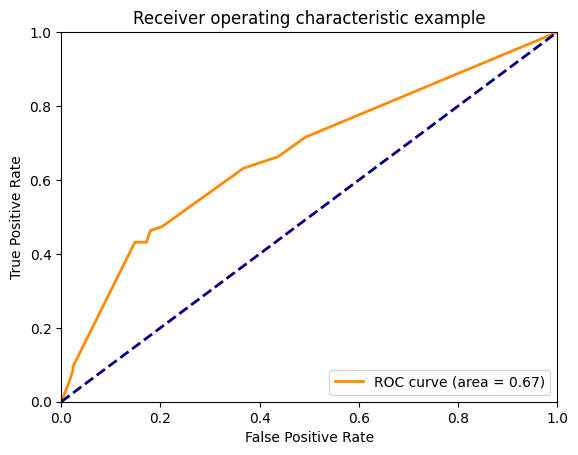

In [39]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

logreg.predict_proba(X_test) returns the predicted probabilities for each class. The result is an array where each element contains two values: the probability of the observation belonging to class 0 and the probability of belonging to class 1.
[:,1] selects the probabilities of the positive class (Survival = True) for each observation. These probabilities are used to generate the ROC curve.

metrics.roc_curve(y_test, preds) computes the False Positive Rate (FPR) and True Positive Rate (TPR) for various threshold values. These rates are used to plot the ROC curve.
fpr is an array of false positive rates, and tpr is an array of true positive rates corresponding to different threshold values.

metrics.auc(fpr, tpr) calculates the Area Under the Curve (AUC) for the ROC curve. AUC is a single value that summarizes the performance of the classifier. It ranges from 0 to 1, where a value closer to 1 indicates a better-performing model.

Axes:

X-axis (False Positive Rate): Ranges from 0.0 to 1.0. It measures the proportion of negative instances that are incorrectly classified as positive.
Y-axis (True Positive Rate): Ranges from 0.0 to 1.0. It measures the proportion of positive instances that are correctly classified as positive.
Diagonal Blue Line:

This line represents a random classifier or baseline model. It starts from (0.0, 0.0) and ends at (1.0, 1.0), indicating that the model's performance is equivalent to random guessing.
Any classifier that performs worse than this line is considered worse than random guessing, while any classifier that performs better has predictive power beyond random chance.
Yellow Curve Line:

This line represents the ROC curve for your classifier. It shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) across different threshold values.
Starting Point (0.0, 0.0): The curve starts at the origin, indicating that with the lowest threshold, the classifier is predicting all instances as negative, resulting in a False Positive Rate and True Positive Rate of 0.

Rise to 0.4: As the threshold decreases, the classifier becomes more inclusive, leading to an increase in both TPR and FPR. The curve rises because more positive instances are correctly classified as positive (increasing TPR), but more negative instances are also misclassified as positive (increasing FPR).
Decrease to End: After reaching a peak, the curve falls, which can occur if the classifier becomes too permissive, leading to a high number of false positives and thus a decrease in TPR. This could also happen if the classifier becomes too specific and starts missing more positive instances.
Interpreting the ROC Curve:

Performance Relative to the Diagonal Line: The ROC curve should ideally be above the diagonal line to indicate that the model has better performance than random guessing. The further the curve is from the diagonal, the better the model's performance.
AUC (Area Under the Curve): The area under the ROC curve (AUC) summarizes the overall performance of the classifier. A higher AUC value indicates a better-performing model. If the curve is close to the diagonal, the AUC will be closer to 0.5, indicating poor performance.

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [40]:
df_with_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'],
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
df_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False,True,False,False
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True,True,False,False
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,True


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [41]:
df_with_dummies['Age'] =df_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Grouping Strategy: The data is grouped by Parch, Sex_male, Pclass_1, and Pclass_2. This means that the imputation of missing Age values is done within each subgroup defined by these features. This stratification ensures that age imputation is more contextually accurate based on similar passenger characteristics.

Imputation Method: Missing values in the Age column are filled with the mean age of the corresponding group. This method takes into account the variability of age within each specific group rather than using a global mean or a simpler imputation method.

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [42]:
def get_logreg_score(data, feature_cols, target_col):
    X = data[feature_cols]
    y = data[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Predict
    logreg_preds = logreg.predict(X_test)

    # Predict probability

    logreg_pred_proba = logreg.predict_proba(X_test)[:,1]

    # Return accuracy rate
    return logreg_score, logreg_preds, logreg_pred_proba

Return Results:
The function returns the accuracy score, the predictions, and the predicted probabilities, providing a comprehensive evaluation of the model's performance.

In [43]:
# ANSWER
# Set Feature Both Numerical, Categorical
target_col = 'Survived'
feature_cols = ['Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp']
get_logreg_score(df_with_dummies, feature_cols, target_col)

(0.6547085201793722,
 array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0], dtype=int64),
 array([0.50289676, 0.20063404, 0.60123223, 0.21370934, 0.8221151 ,
        0.25657827, 0.58813253, 0.57038789, 0.63694459, 0.17531226,
        0.22739435, 0.22047571, 0.44342018, 0.48321685, 0.21370934,
   

Plot the ROC curve for the new model:

In [44]:
# ANSWER
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

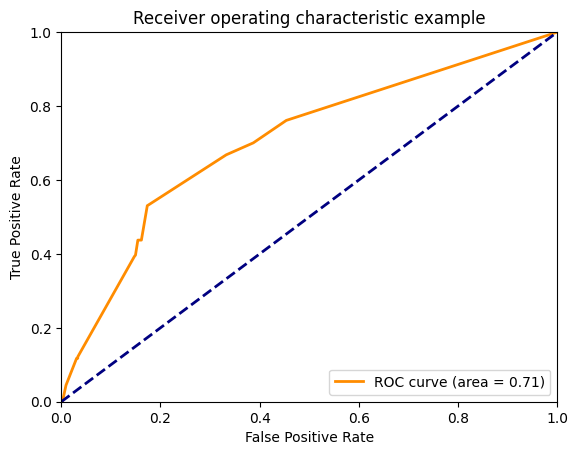

In [45]:
# Train
plot_roc_curve(X_train, y_train)

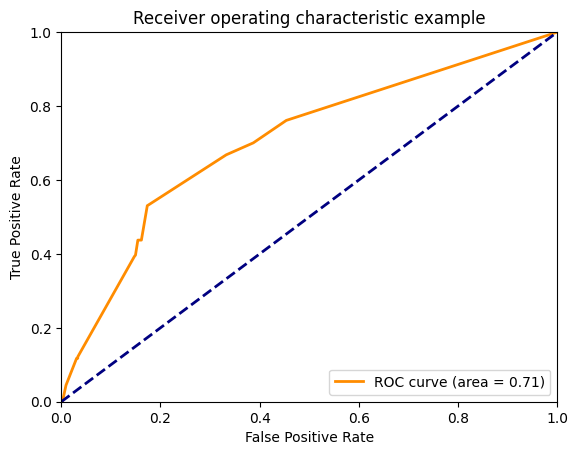

In [46]:
# Test
plot_roc_curve(X_train, y_train)

Can we improve the model by including the remaining features?

In [47]:
# ANSWER
target_col = 'Survived'
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
get_logreg_score(df_with_dummies, feature_cols, target_col)

C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8026905829596412,
 array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0], dtype=int64),
 array([0.82181626, 0.08191032, 0.88638873, 0.6582594 , 0.93007313,
        0.11124844, 0.22372323, 0.85052709, 0.51929116, 0.57058732,
        0.09558015, 0.57273255, 0.21970601, 0.26262503, 0.65812306,
   

In [48]:
ttwd = df_with_dummies
print("Male survival: {:5.2f}% of {}\nFemale survival: {:5.2f}% of {}\nChild survival: {:5.2f}% of {}".format(
                                            100 * ttwd[ttwd.Sex_male == 1].Survived.mean(), ttwd.Sex_male.sum(),
                                            100 * ttwd[ttwd.Sex_female == 1].Survived.mean(), ttwd.Sex_female.sum(),
                                            100 * ttwd[ttwd.Age < 16].Survived.mean(), len(ttwd[ttwd.Age < 16])))

Male survival: 18.89% of 577
Female survival: 74.20% of 314
Child survival: 59.04% of 83


In [50]:
X = df_with_dummies[feature_cols]
y = df_with_dummies[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(X_train, y_train)

# Make a data frame of results, including actual and predicted response:
y_hat = logreg.predict(X)
y_hats = pd.Series(y_hat, index = X.index)
y_hatdf = pd.DataFrame({'y_hat': y_hats})
y_actuals = pd.Series(y, index = X.index)    # names 'y', 'y_test' are in use
y_actualdf = pd.DataFrame({'y_actual': y_actuals})
ttall = y_hatdf.join(y_actualdf).join(X)
ttall.head()

C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_hat,y_actual,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
2,1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
3,1,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
4,1,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
5,0,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


In [51]:
print("Male survival: {:5.2f}% of {}\nFemale survival: {:5.2f}% of {}\nChild survival: {:5.2f}% of {}".format(
                                                    100 * ttall[ttall.Sex_male == 1].y_hat.mean(), ttall.Sex_male.sum(),
                                                    100 * ttall[ttall.Sex_female == 1].y_hat.mean(), ttall.Sex_female.sum(),
                                                    100 * ttall[ttall.Age < 16].y_hat.mean(), len(ttall[ttall.Age < 16])))

Male survival:  5.55% of 577
Female survival: 86.31% of 314
Child survival: 49.40% of 83


## Homework

1. Remove the `random_state` parameter, so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

#### 2. Use Cross-Validation

Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

In [52]:
from sklearn.model_selection import cross_val_score
target_col = 'Survived'
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
logreg = LogisticRegression()
scores = cross_val_score(logreg, df_with_dummies[feature_cols], df_with_dummies[target_col], cv=5)
scores.mean()

C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

0.793496955621116

#### 3. Look at the fpr & tpr vectors for the best model.

In [53]:
# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(X_train, y_train)

# Predict
y_pred_class = logreg.predict(X_test)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[113  15]
 [ 29  66]]


C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Classification Accuracy:** Overall, how often is the classifier correct?

In [54]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.8026905829596412
0.8026905829596412


**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [55]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.19730941704035873
0.19730941704035876


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

In [56]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.6947368421052632
0.6947368421052632


**Specificity:** When the actual value is negative, how often is the prediction correct?

Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
all negative = TN + FP

In [57]:
specificity = TN / (TN + FP)

print(specificity)

0.8828125


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [58]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.1171875
0.1171875


**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [59]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.8148148148148148
0.8148148148148148




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



